<a href="https://colab.research.google.com/github/Jyl7hf/Computer-Vision-Project/blob/main/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center><h1> <b> Object Detection Using YOLO <b> </h1></center>

This tutorial is designed to provide a comprehensive understanding of how to use YOLO, a state-of-the-art method in computer vision, for detecting objects in images.

Object detection and classification is a key technology in many areas, such as automated vehicles, security, and even healthcare.

We will begin with the basics of preparing (pre processing) an image dataset, ensuring it is ready for effective model training.We will then explore how YOLO, a type of convolutional neural network, automatically extracts features from images to recognize different objects. Understanding this process is crucial for grasping how YOLO operates.

The core of this tutorial is focused on transfer learning using YOLO. We will teach you how to take a pre-trained YOLO model and adapt it to a new dataset. This technique is efficient and powerful, allowing us to harness the strengths of YOLO with less computational effort.

By the end of this tutorial, you will have hands-on experience with preparing data, implementing YOLO, and understanding the principles behind it. This tutorial aims to equip students with practical skills and knowledge in one of the most exciting fields in technology.

Since its inception, the YOLO family of object detection models has come a long way. YOLOv8 is the most recent addition to this famous anchor-based single-shot family of object detectors. It comes with a bunch of improvements which include state-of-the-art accuracy and speed.  In this article, we will be fine tuning the YOLOv8 object detection model on a real-world pothole detection dataset.

In the previous lecture, you were asked to make your own custom datasets for a project you want to work on. Today we will explore how to finetune YOLO on a certain dataset.  

Importing required Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

## Heirarchy of Folders correction

Defining paths to train and test folders.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# imageDirectory = "projImg"
# labelDirectory = "projLabel"
# outputDirectory = "dataset"

In [ ]:
# # split data into train/test

# # only use this on radvess data
# ############# Unscaled test/train set #############
# # 80%, 20%
# # X_train, X_test, y_train, y_test =train_test_split(
# #     features,
# #     emotions,
# #     test_size=0.2, # using 20%
# #     random_state=42
# # )

# def split_dataset(image_dir, label_dir, output_dir, train_ratio=0.8, test_ratio=0.1, val_ratio=0.1):
# # Create output directories
#   for split in ['train', 'val', 'test']:
#     os.makedirs(os.path.join(output_dir, split, 'images'), exist_ok=True)
#     os.makedirs(os.path.join(output_dir, split, 'labels'), exist_ok=True)

#   # Get all image and label file paths
#   image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

#   # Ensure corresponding labels exist and create a list of (image_path, label_path) tuples
#   data_pairs = []
#   for img_file in image_files:
#     base_name = os.path.splitext(img_file)[0]
#     label_file = base_name + '.txt'
#     if os.path.exists(os.path.join(label_dir, label_file)):
#       data_pairs.append((os.path.join(image_dir, img_file), os.path.join(label_dir, label_file)))
#     else:
#       print(f"Warning: No label found for image {img_file}. Skipping.")

#   # Split into train and temp (validation/test)
#   train_data, temp_data = train_test_split(data_pairs, test_size=(val_ratio), random_state=42)

#   # Split temp into validation/test
#   val_data, test_data = train_test_split(temp_data, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

#   # Copy files to respective directories
#   for split_name, data_list in [('train', train_data), ('val', val_data), ('test', test_data)]:
#     for img_path, label_path in data_list:
#       shutil.copy(img_path, os.path.join(output_dir, split_name, 'images'))
#       shutil.copy(label_path, os.path.join(output_dir, split_name, 'labels'))

#   print(f"Dataset split completed. Train: {len(train_data)}, Validation: {len(val_data)}, Test: {len(test_data)}")

# split_dataset(imageDirectory, labelDirectory, outputDirectory)

Dataset split completed. Train: 1602, Validation: 89, Test: 89


In [ ]:
test_dir = '/content/drive/MyDrive/CVProjectDataset/dataset/test'
train_dir = '/content/drive/MyDrive/CVProjectDataset/dataset/train'
val_dir = '/content/drive/MyDrive/CVProjectDataset/dataset/val'



The train and test folders have all the images and labels together.

But for YOLO, the directories should be in:

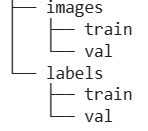


Making directories according to above struture of folders

In [ ]:
#set the paths to labels and images directory
# label_dir= "/dataset/Final_data/labels"
# image_dir="/dataset/Final_data/images"

In [ ]:
import cv2

## Checking Missing Files

Checking the folders if every image file has a corresponding label file


(We will copy the code, we already used in previous turorial after updating)

In [ ]:
#The lists of all the images and labels for train and validation set:
train_images=glob.glob(os.path.join(image_dir, "train",'*.jpg'))
train_labels=glob.glob(os.path.join(label_dir, "train",'*.txt'))
val_images=glob.glob(os.path.join(image_dir, "val",'*.jpg'))
val_labels=glob.glob(os.path.join(label_dir, "val",'*.txt'))
#print(val_labels)

# Get the list of filenames without extensions
image_files_train = {file.split("/")[-1].split(".")[0] for file in train_images}
label_files_train = {file.split("/")[-1].split(".")[0] for file in train_labels}

image_files_val = {file.split("/")[-1].split(".")[0] for file in val_images}
label_files_val = {file.split("/")[-1].split(".")[0] for file in val_labels}
#print(image_files_val)



In [ ]:
print(len(image_files_val), "  =  ", len(label_files_val))

56   =   56


In [ ]:
# Find extra files in each folder

#TRAINING DATA
extra_images_train = image_files_train - label_files_train
extra_labels_train = label_files_train - image_files_train

# Output the results
print(f"Training Extra images (without corresponding labels): {extra_images_train}")
print(f"Training Extra labels (without corresponding images): {extra_labels_train}")


#VALIDATION DATA
extra_images_val = image_files_val - label_files_val
extra_labels_val = label_files_val - image_files_val

# Output the results
print(f"Validation Extra images (without corresponding labels): {extra_images_val}")
print(f"Validation Extra labels (without corresponding images): {extra_labels_val}")

Training Extra images (without corresponding labels): set()
Training Extra labels (without corresponding images): set()
Validation Extra images (without corresponding labels): set()
Validation Extra labels (without corresponding images): set()


Make sure that the above info is correct by chceking the data manually.

Now removing from the dataset:

In [ ]:
for file in extra_images_train:
     os.remove(os.path.join(image_dir, "train", file + '.jpg')) # or '.png' depending on your image format

for file in extra_images_val:
     os.remove(os.path.join(image_dir, "val", file + '.jpg'))

Now run the above cells again to find if all the missing data is deleted.

# Custom object detection using YOLO

First install and import

In [ ]:
# %pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

## Training YOLO

We are going to select small pretrained (on COCO dataset) model of YOLOv8

In [ ]:
model = YOLO('/content/drive/MyDrive/CVProjectDataset/runs/detect/train/weights/best.pt') # pretrained model

The detailed architecture of the model can be seen from:


In [ ]:
# model

In [ ]:
%%writefile config.yaml
path: /content/drive/MyDrive/CVProjectDataset/Final_data
train: /content/drive/MyDrive/CVProjectDataset/Final_data/images/train
test: /content/drive/MyDrive/CVProjectDataset/Final_data/images/test
val: /content/drive/MyDrive/CVProjectDataset/Final_data/images/val

# Classes
nc: 6 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: displayport
  1: ethernet
  2: hdmi
  3: usb-a
  4: usb-c
  5: vga

Writing config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [ ]:
model.train(data="/content/drive/MyDrive/CVProjectDataset/config.yaml",epochs=10,patience=5,batch=8, lr0=0.0008,imgsz=640)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CVProjectDataset/config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0008, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mas

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7989780f59a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [ ]:
metrics = model.val(data="/content/drive/MyDrive/CVProjectDataset/config.yaml")  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 67.4±83.9 MB/s, size: 184.9 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1a8nII8CW4KPDngn_NjnG5_eMgUtfUOUZ/CVProjectDataset/Final_data/labels/val.cache... 89 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 89/89 157.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.1it/s 5.4s
                   all         89        276      0.705      0.761      0.761      0.439
           displayport          3          9      0.615      0.444      0.572       0.33
              ethernet         26         32      0.791       0.83      0.845      0.586
                  hdmi         26         30      0.586      0.667      0.612      0.335
                 usb-a         49        121      0.736     

np.float64(0.7607057902864615)

Showing confusion matrix, that is already stored in detect/train folder

In [2]:
%matplotlib inline
from PIL import Image

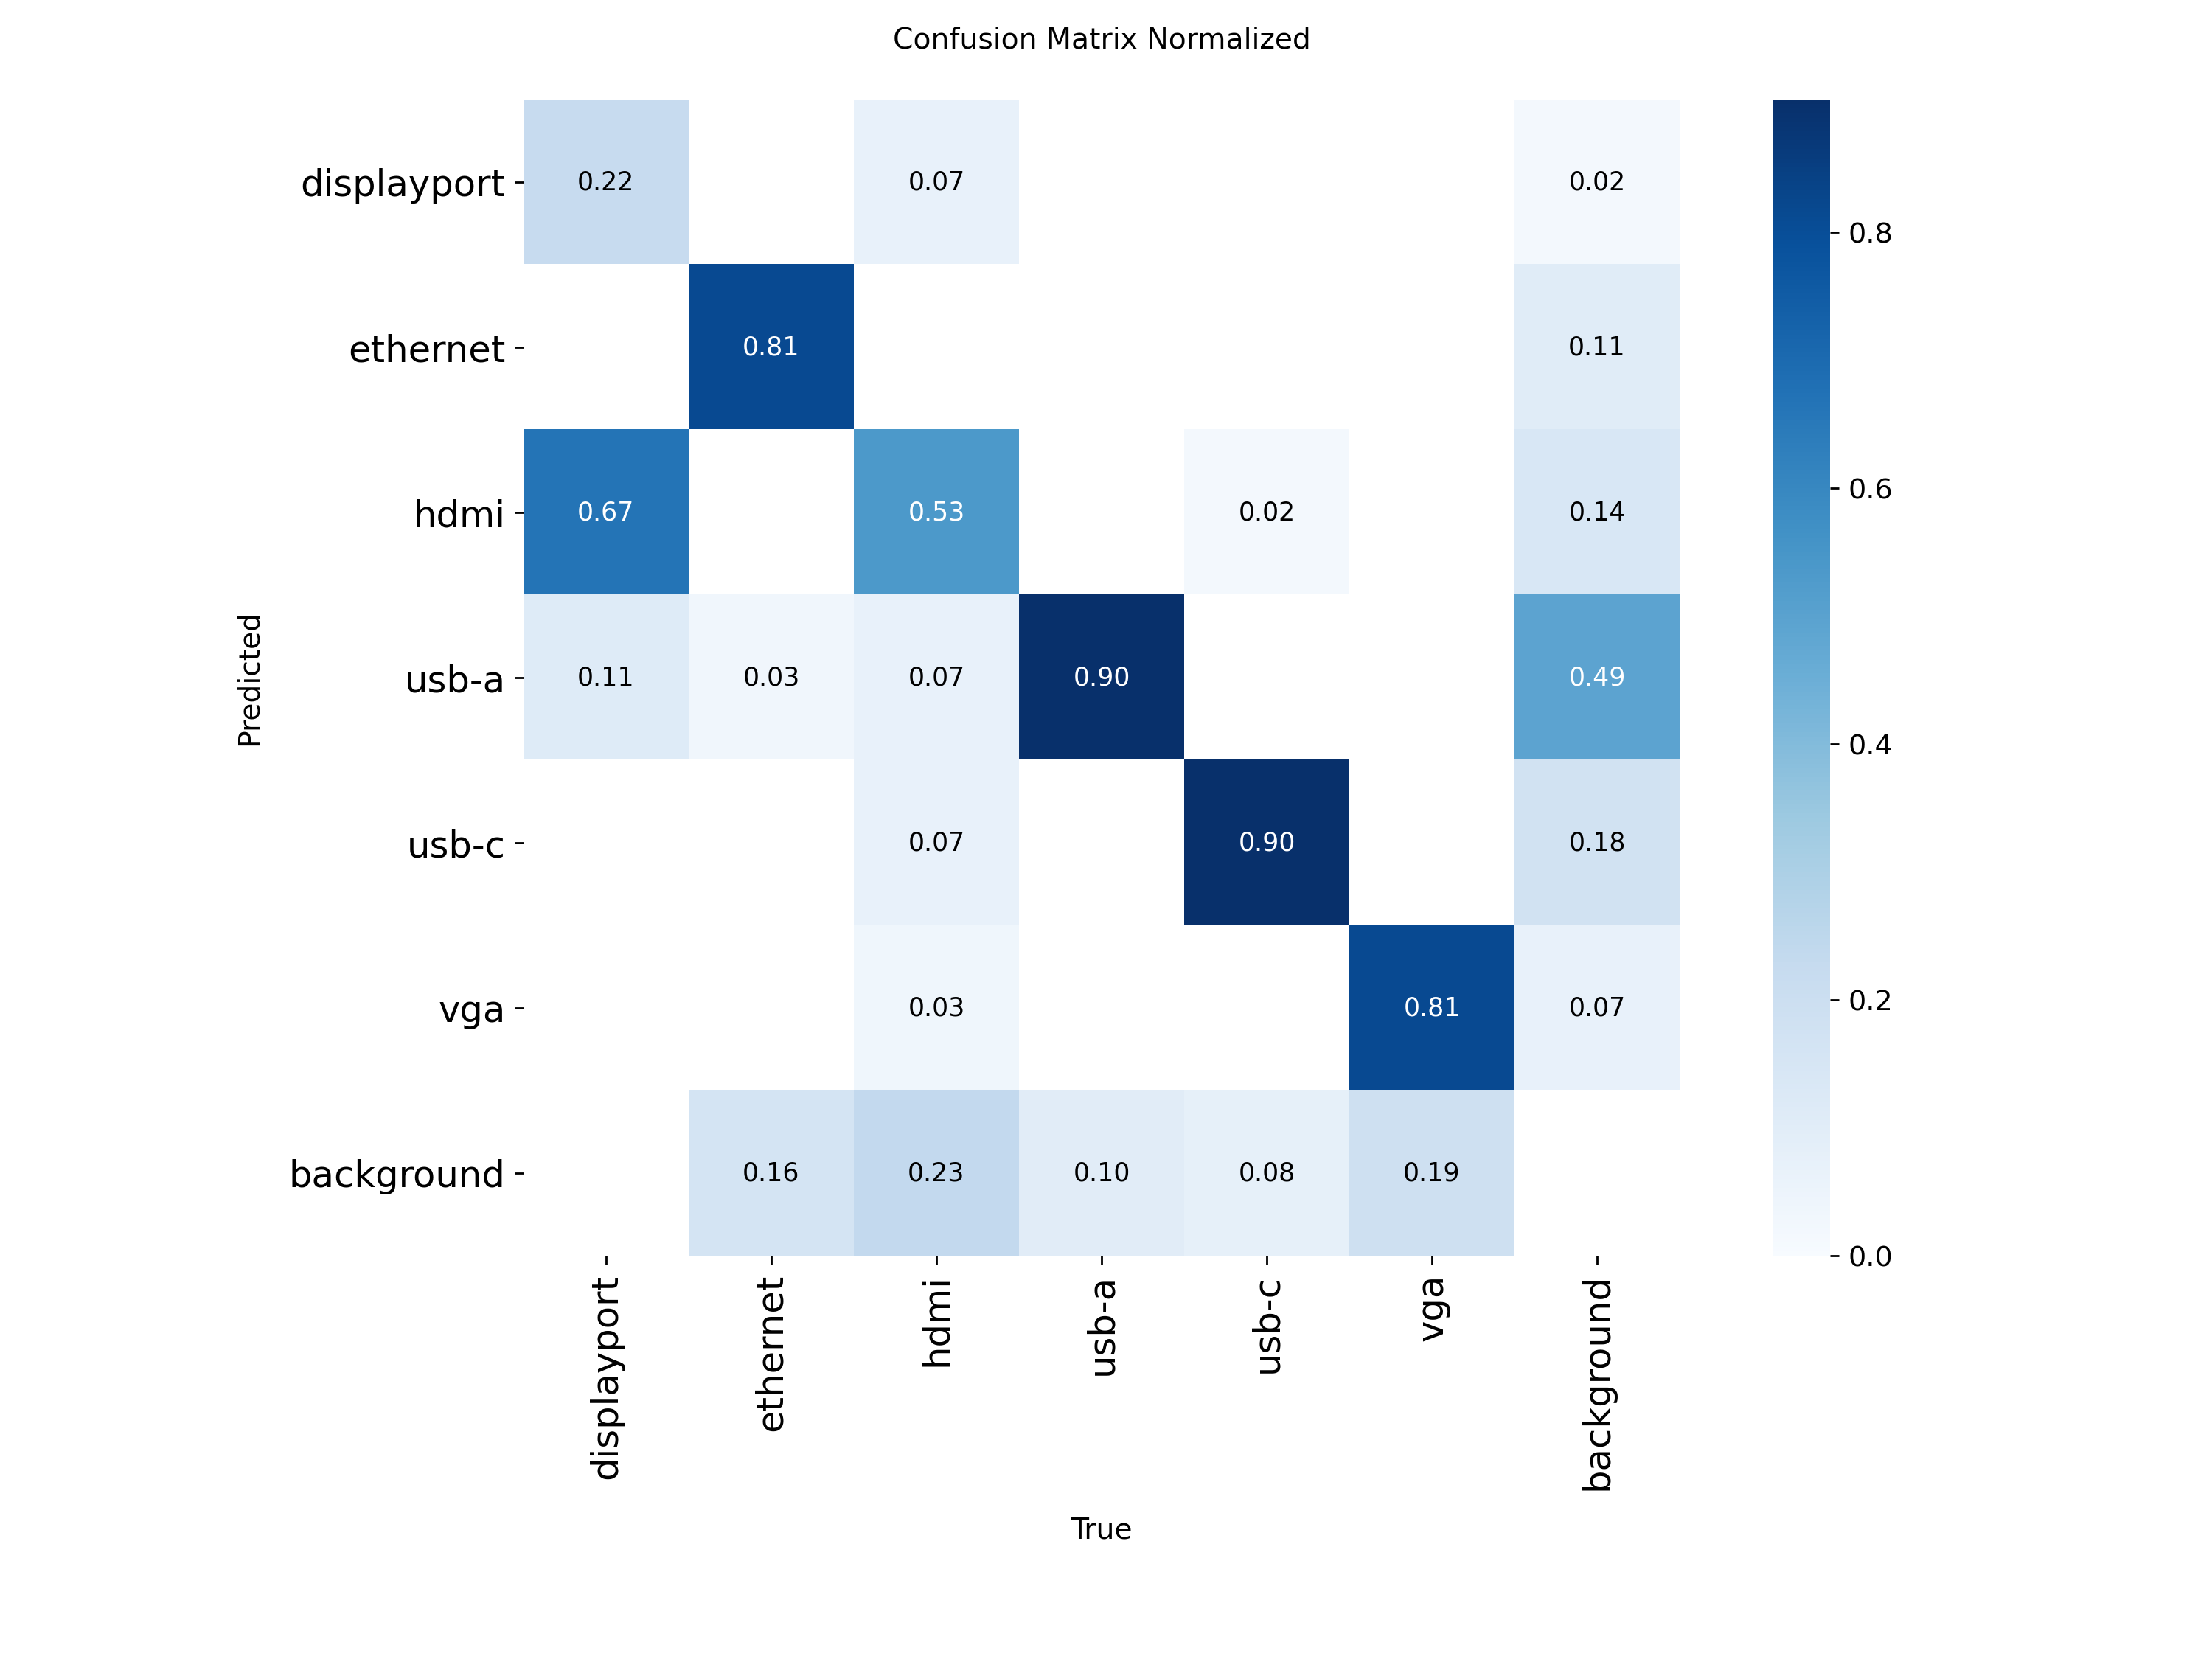

In [5]:
Image.open('/content/drive/MyDrive/CVProjectDataset/runs2/detect/val/confusion_matrix_normalized.png')

##Prediction

In [ ]:
# model = YOLO('/content/drive/MyDrive/CVProjectDataset/runs/detect/train/weights/last.pt')  # load a custom model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Predict with the model with any image from internet?
results = model('/content/drive/MyDrive/CVProjectDataset/computer-port-types.jpg', save=True)


image 1/1 /content/drive/MyDrive/CVProjectDataset/computer-port-types.jpg: 384x640 1 ethernet, 3 hdmis, 2 usb-as, 3 usb-cs, 45.4ms
Speed: 2.6ms preprocess, 45.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict


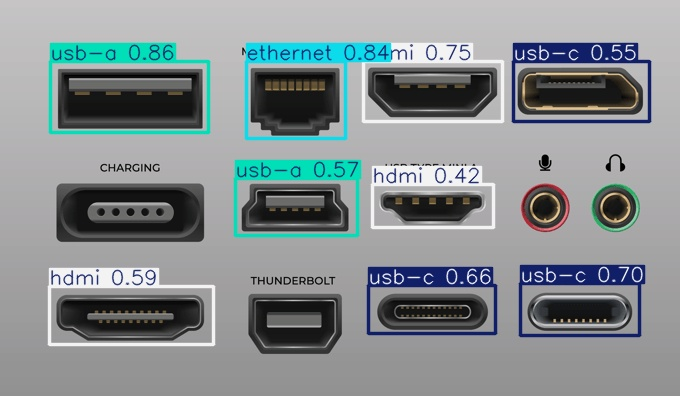

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict/computer-port-types.jpg')